# Census Income Data Set


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('adult_data.csv',header=None)
df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Salary_Class']
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Let's look at the shape
df.shape

(32561, 15)

In [4]:
# We saw that there are some rows in the columns - (workclass,occupation,native_country) with '?' symbol. Let's see how many are there

dx=df[(df['workclass']=="?") | (df['occupation']=="?") | (df['native_country']==" ?")]
dx.shape

(583, 15)

In [5]:
print('Percent of rows with ?',2300/32561*100)

# 7 percent of rows have '?'. Let's drop these rows

Percent of rows with ? 7.0636651208500965


In [6]:
df.drop(df[(df['workclass']==" ?") | (df['occupation']==" ?") | (df['native_country']==" ?")].index,inplace=True)
df.shape

(30162, 15)

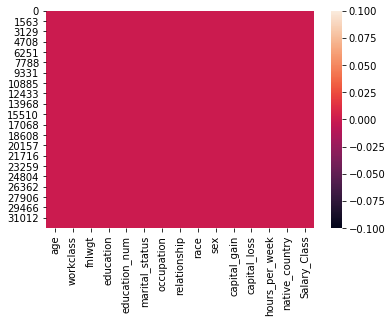

In [7]:
# Let's check for null values
sns.heatmap(df.isnull())

# No Null Values found

In [8]:
# Let's have a look at the datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
Salary_Class      object
dtype: object

In [9]:
# Let's describe the dataset
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_Class
count,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162,30162
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504,22654
mean,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN,NaN
std,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176272e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.376285e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# EDA on Categorical Values

(array([22654.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

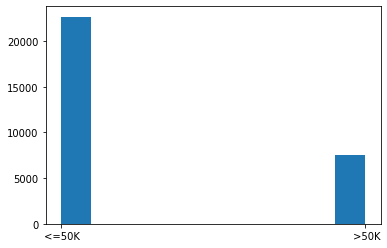

In [10]:
#Let's also looks at the label (target)
plt.hist(df['Salary_Class'])
# A lot of data is for <=50K salary

In [11]:
# Let's understand and clean feature Workclass 
df['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

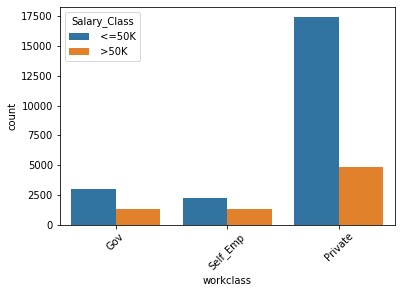

In [12]:
#We can merge the sub-categories
def Self_Emp(x):
    if x in [' Self-emp-not-inc', ' Self-emp-inc', ' Without-pay']:
        return 'Self_Emp'
    else:
        return x
def Gov(y):
    if y in [' Local-gov', ' State-gov', ' Federal-gov']:
        return 'Gov'
    else:
        return y
df['workclass'] = df['workclass'].apply(Self_Emp)
df['workclass'] = df['workclass'].apply(Gov)

sns.countplot(df['workclass'],hue=df['Salary_Class'])
plt.xticks(rotation=45)

In [13]:
# Let's see for education
df['education'].value_counts()
# There seems to be a lot of unnecessary Categories that can be merged


 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [14]:
#We can merge the sub-categories
def School(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th',' Preschool']:
        return ' School'
    else:
        return x
def College(y):
    if y in [' Some-college', ' Assoc-voc', ' Assoc-acdm']:
        return ' College'
    else:
        return y
df['education'].replace(' Prof-school', ' Masters',inplace=True)

In [15]:
df['education'] = df['education'].apply(School)
df['education'] = df['education'].apply(College)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

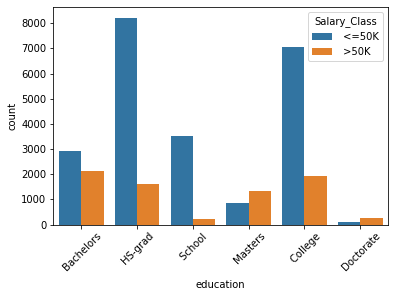

In [16]:
# Let's see for education
sns.countplot(df['education'],hue=df['Salary_Class'])
plt.xticks(rotation=45)

# Doctorates and Masters have more ratio of people who are earning more than 50K (average)

In [17]:
# Let's see for Marital Status
df['marital_status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital_status, dtype: int64

In [18]:
# Let's merge categories as follows

def Mar_status(y):
    if(y==' Separated' or y==' Widowed' or y==' Divorced'):
        return('Married Before')
    elif (y== ' Never-married'):
        return(y)
    else:
        return('Married')

In [19]:
df['marital_status'] = df['marital_status'].apply(Mar_status)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

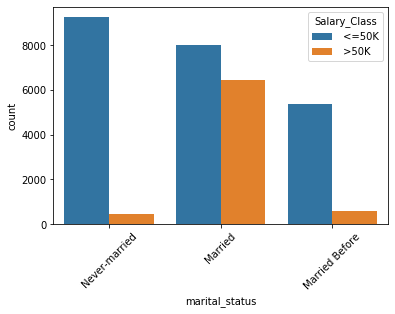

In [20]:
sns.countplot(df['marital_status'],hue=df['Salary_Class'])
plt.xticks(rotation=45)

# We observe that those who are married have almost equal proportions with <50k and >50k

In [21]:
# Let's look at Occupation distribution
df['occupation'].value_counts()


 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

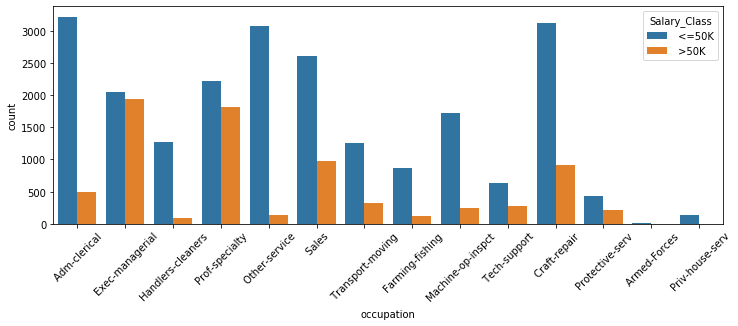

In [22]:
# Let's visulaize the graph for occupation
plt.figure(figsize=(12,4))
sns.countplot(df['occupation'],hue=df['Salary_Class'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

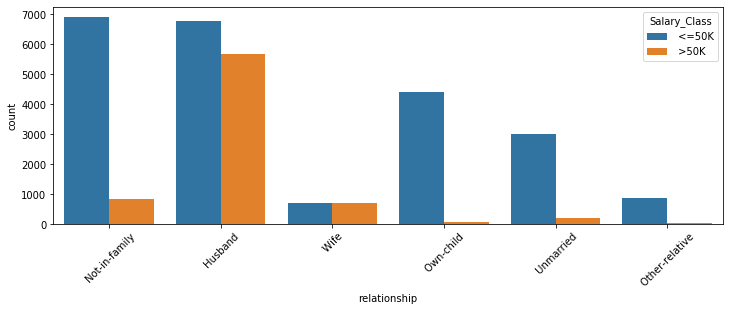

In [23]:
# Let's visulaize the graph for relationship
plt.figure(figsize=(12,4))
sns.countplot(df['relationship'],hue=df['Salary_Class'])
plt.xticks(rotation=45)
# In all cases most people earn below 50K

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

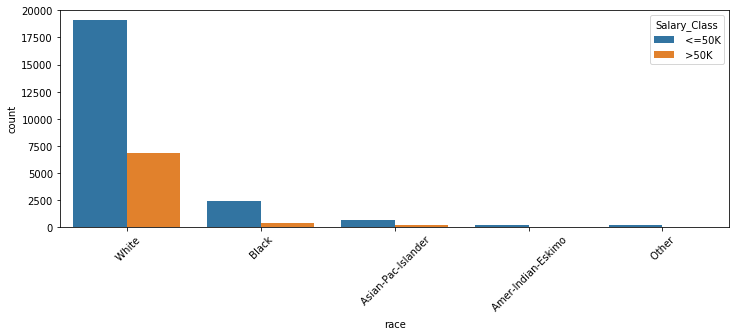

In [24]:
# Let's visulaize the graph for race
plt.figure(figsize=(12,4))
sns.countplot(df['race'],hue=df['Salary_Class'])
plt.xticks(rotation=45)
# In all cases most people earn below 50K

(array([0, 1]), <a list of 2 Text xticklabel objects>)

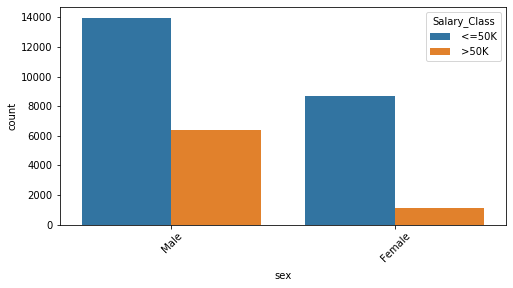

In [25]:
# Let's visulaize the graph for sex
plt.figure(figsize=(8,4))
sns.countplot(df['sex'],hue=df['Salary_Class'])
plt.xticks(rotation=45)
# In both genders most people earn below 50K

In [26]:
# Let's see for native-country
df['native_country'].value_counts()

# There are huge no. of categories

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

North_America          27720
Latin_South_America     1315
Asia                     634
Europe                   493
Name: native_country, dtype: int64

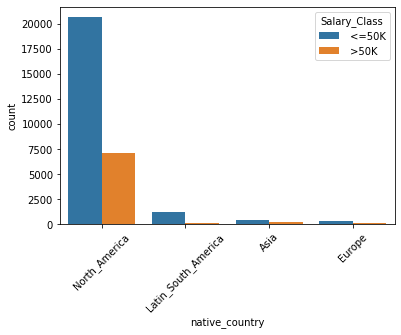

In [27]:
# Let's merge categories as continents
# Creating Lists
Asia = [' China',' Hong',' India',' Iran',' Cambodia',' Japan', ' Laos',
          ' Philippines' ,' Vietnam' ,' Taiwan', ' Thailand']
North_America = [' Canada',' United-States',' Puerto-Rico' ]

Europe = [' England' ,' France', ' Germany' ,' Greece',' Holand-Netherlands',' Hungary',
            ' Ireland',' Italy',' Poland',' Portugal',' Scotland',' Yugoslavia']

Latin_South_America = [' Columbia',' Cuba',' Dominican-Republic',' Ecuador',
                             ' El-Salvador',' Guatemala',' Haiti',' Honduras',
                             ' Mexico',' Nicaragua',' Outlying-US(Guam-USVI-etc)',' Peru',
                            ' Jamaica',' Trinadad&Tobago',' South']

def Continents(y):
    if(y in Asia):
        return('Asia')
    elif (y in North_America):
        return('North_America')
    elif (y in  Europe):
        return('Europe')
    else:
        return('Latin_South_America')
          
df['native_country'] = df['native_country'].apply(Continents)
    
sns.countplot(df['native_country'],hue=df['Salary_Class'])
plt.xticks(rotation=45)

# We observe that in all the continents distribution is with <50k is more than >50k
df['native_country'].value_counts()

# Continous Features

In [28]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
#Let's store them in a list
continous=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009D29EBB788>,
      dtype=object)

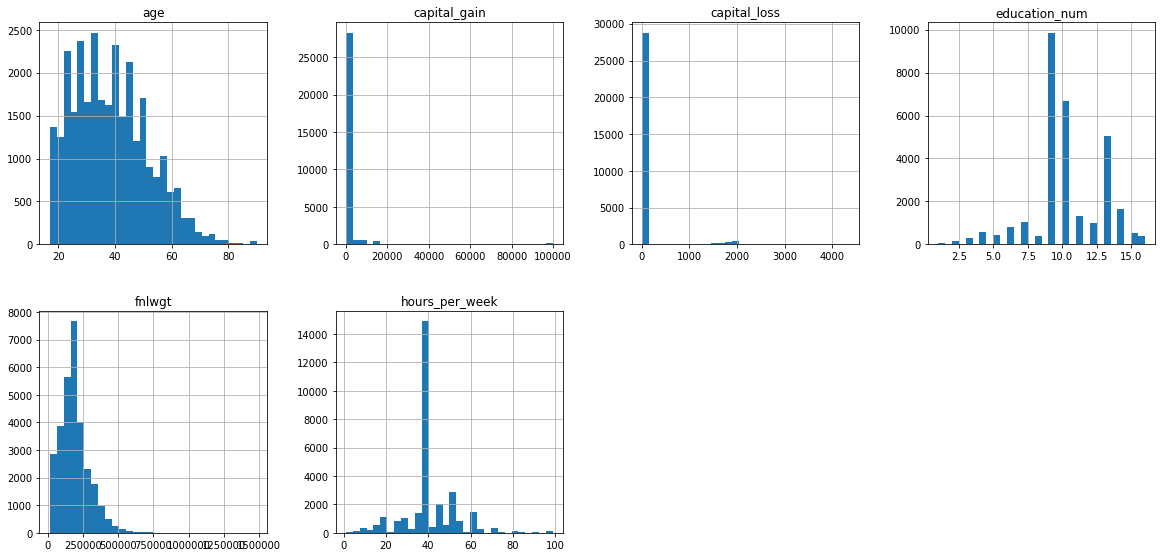

In [32]:
#Let's see the distributions
df[continous].hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [33]:
#Let's check skewness
df.skew()

age                0.530228
fnlwgt             1.459220
education_num     -0.305379
capital_gain      11.902682
capital_loss       4.526380
hours_per_week     0.330869
dtype: float64

In [34]:
# Treating for skewness
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.square(df[col])
df.skew()

age               0.530228
fnlwgt           -0.667435
education_num    -0.305379
capital_gain      3.073208
capital_loss      4.272387
hours_per_week    0.330869
dtype: float64

In [35]:
# As there's still a lot of skewness Let's do it one more time
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.square(df[col])
df.skew()

# Skewness removed to a huge extent. capital_gain and capital_loss have very high skewness as seen from the distribution plot.They have to be 

age               0.530228
fnlwgt           -0.326678
education_num    -0.305379
capital_gain      3.007636
capital_loss      4.266312
hours_per_week    0.330869
dtype: float64

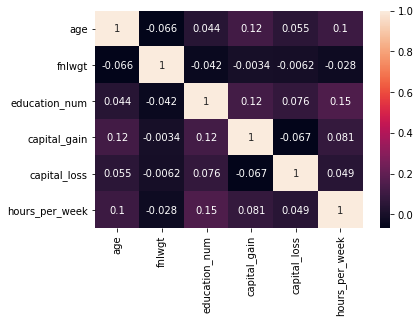

In [36]:
# Let's see correlation within continous variables
sns.heatmap(df.corr(),annot=True)

# Not Enough Correlation

In [37]:
# Let's do Label Encoding on the Categorical Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes=="object":
        df[col]=le.fit_transform(df[col])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_Class
0,39,1,16065.118978,0,13,0,0,1,4,1,2.161573,0.0,40,3,0
1,50,2,16480.598408,0,13,1,3,0,4,1,0.000000,0.0,13,3,0
2,38,0,22750.515172,3,9,2,5,1,4,1,0.000000,0.0,40,3,0
3,53,0,23385.089691,5,7,1,5,0,2,1,0.000000,0.0,40,3,0
4,28,0,26277.760852,0,13,1,9,5,2,0,0.000000,0.0,40,2,0


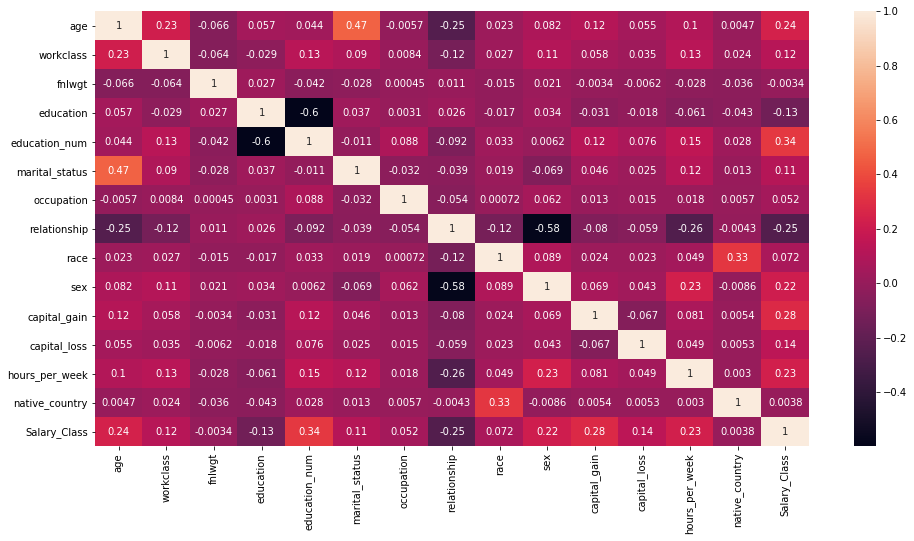

In [38]:
# Let's see correlation between all variables
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
# Not much Correlation

In [39]:
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)
# Let's treat the outliers if any

(30162, 15)
(24149, 15)


In [40]:
# Let's Separate our dataset into Features and target
x=df.drop(columns=["Salary_Class"])
y=df[["Salary_Class"]]

In [41]:
# Let's do Standard Scaling on the Continous variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x[continous]=sc.fit_transform(x[continous])
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
1,0.971204,2,-1.113739,0,1.254136,1,3,0,4,1,-0.053476,0.0,-2.506684,3
2,0.038003,0,0.422739,3,-0.418392,2,5,1,4,1,-0.053476,0.0,-0.009372,3
3,1.204504,0,0.578246,5,-1.254656,1,5,0,2,1,-0.053476,0.0,-0.009372,3
4,-0.739665,0,1.287111,0,1.254136,1,9,5,2,0,-0.053476,0.0,-0.009372,2
5,-0.039764,0,0.943732,4,1.672268,1,3,5,4,0,-0.053476,0.0,-0.009372,3


# Modelling

In [42]:
# For Classification let's focus on auc-roc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [43]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="roc_auc")
    print("Mean ROC_AUC score for classifier: ",c_scores.mean())
    print("standard deviation in ROC_AUC score for classifier: ",c_scores.std())
    print(c_scores)

In [44]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [45]:
rfc=RandomForestClassifier(n_estimators=500)
r_state=max_aucroc_score(rfc,x,y)

max auc roc score corresponding to  79  is  0.7212401932972043


In [46]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="roc_auc")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 19}

In [47]:
knn=KNeighborsClassifier(n_neighbors=19)
r_state=max_aucroc_score(knn,x,y)

max auc roc score corresponding to  69  is  0.7281521661156001


In [48]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"]}
clf = GridSearchCV(dc, parameters, cv=5,scoring="roc_auc")
clf.fit(x, y)
clf.best_params_

{'criterion': 'entropy'}

In [54]:
dc=DecisionTreeClassifier(criterion="entropy")
r_state=max_aucroc_score(dc,x,y)

max auc roc score corresponding to  69  is  0.7027598980037694


In [50]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=max_aucroc_score(lg,x,y)

max auc roc score corresponding to  55  is  0.6466782749333176


In [51]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
r_state=max_aucroc_score(gnb,x,y)

max auc roc score corresponding to  83  is  0.5888293258727395


In [55]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
r_state=max_aucroc_score(gb,x,y)

max auc roc score corresponding to  80  is  0.7288393689798421


In [56]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
r_state=max_aucroc_score(ad,x,y)

max auc roc score corresponding to  80  is  0.7304950143146884


In [57]:
# Cross Validation

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)

print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)

print("\n\nAdaboost Classifier\n\n")
model_evaluation(ad,x,y)



Random Forest Classifier


Mean ROC_AUC score for classifier:  0.8750363102656926
standard deviation in ROC_AUC score for classifier:  0.004009193514805039
[0.87216342 0.86976935 0.8805805  0.87859987 0.87406841]


KNN Classifier


Mean ROC_AUC score for classifier:  0.8707259660545258
standard deviation in ROC_AUC score for classifier:  0.004483458685386312
[0.864977   0.86769443 0.87296203 0.87798888 0.87000749]


DecisionTree Classifier


Mean ROC_AUC score for classifier:  0.684568449382566
standard deviation in ROC_AUC score for classifier:  0.011591728824317204
[0.67370255 0.66887582 0.69735561 0.69641285 0.68649541]


Logistic Regression Classifier


Mean ROC_AUC score for classifier:  0.8193330533657175
standard deviation in ROC_AUC score for classifier:  0.008999722570392743
[0.80254126 0.8192007  0.82105743 0.82843351 0.82543236]


Gaussian NB Classifier


Mean ROC_AUC score for classifier:  0.8315742388694927
standard deviation in ROC_AUC score for classifier:  0.007253001

# Selecting Gradient Boosting Classifier with Mean ROC_AUC score 0.893and StdDev 0.003

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 72,test_size=0.20)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

r2 Score is: 0.11924583168486969
RMSE: 0.3746634100195179
Confusion matrix 
 [[3662  207]
 [ 471  490]]
classification report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      3869
           1       0.70      0.51      0.59       961

    accuracy                           0.86      4830
   macro avg       0.79      0.73      0.75      4830
weighted avg       0.85      0.86      0.85      4830

AUC_Score: 0.7281916694749938
[1 0 1 ... 0 0 0]


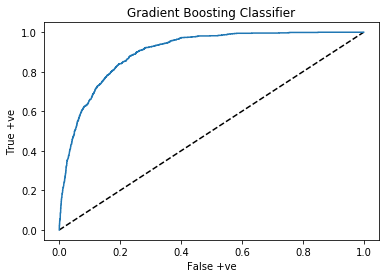

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
print('r2 Score is:', r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('AUC_Score:',roc_auc_score(y_test,y_pred))
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('Gradient Boosting Classifier')
plt.show
print(y_pred)

In [60]:
from sklearn.externals import joblib
joblib.dump(gb,'Census_Income.pkl')

['Census_Income.pkl']